In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def DataGen(logic):
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    if logic == "NAND":
        y = np.array([1,1,1,0])

    elif logic == "NOR":
        y = np.array([1,0,0,0])

    elif logic == "XOR":
        y = np.array([0,1,1,0])

    elif logic == "XNOR":
        y = np.array([1,0,0,1])

    return X,y

In [11]:
def Preprocess(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

In [12]:
def perceptronLearn(X,y,lr=0.01,epochs=10000):
    w = np.random.rand()
    for _ in range(epochs):
        for i in range(X.shape[0]):
            yPred = np.dot(X[i],w)>0
            w+=lr*(y[i]-yPred)*X[i].reshape(-1,1)
    return w

In [13]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [14]:
def perceptronSigmoid(X,y,lr=0.01,epochs=10000):
    w = np.random.rand()
    for _ in range(epochs):
        for i in range(X.shape[0]):
            yPred = sigmoid(np.dot(X[i],w))
            w+=lr*(y[i]-yPred)*X[i].reshape(-1,1)
    return w

In [15]:
def plot_points(X: np.ndarray, y: np.ndarray) -> None:
    """ 
    Plots a scatter plot of points with two different classes.

    Parameters:
        X (numpy.ndarray): A 2D array of shape (n, 2) containing the coordinates of the points.
        y (numpy.ndarray): A 2D array of shape (n, 1) containing the class labels (0 or 1) for each point.
    """
    plt.figure(figsize=(3, 3))
    plt.scatter(
        X[y.flatten() == 0][:, 0],
        X[y.flatten() == 0][:, 1],
        c="red",
        label="0",
        edgecolors="k",
    )
    plt.scatter(
        X[y.flatten() == 1][:, 0],
        X[y.flatten() == 1][:, 1],
        c="blue",
        label="1",
        edgecolors="k",
    )
    plt.xlabel("X1")
    plt.ylabel("X2")
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


def plot_decision_boundary(X: np.ndarray, y: np.ndarray, W: np.ndarray) -> None:
    """
    Plots the decision boundary along with the scatter plot of points.

    Parameters:
        X (numpy.ndarray): A 2D array of shape (n, 2) containing the coordinates of the points.
        y (numpy.ndarray): A 2D array of shape (n, 1) containing the class labels (0 or 1) for each point.
        W (numpy.ndarray): A 2D array of shape (3, 1) containing the weights of the decision boundary.
    """
    c, x_coeff, y_coeff = W.flatten()
    plt.figure(figsize=(3, 3))
    plt.scatter(
        X[y.flatten() == 0][:, 0],
        X[y.flatten() == 0][:, 1],
        c="red",
        label="0",
        edgecolors="k",
    )
    plt.scatter(
        X[y.flatten() == 1][:, 0],
        X[y.flatten() == 1][:, 1],
        c="blue",
        label="1",
        edgecolors="k",
    )
    plt.xlabel("X1")
    plt.ylabel("X2")
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    x_values = np.linspace(x_min - 1, x_max + 1, 100)
    y_values = (c - x_coeff * x_values) / y_coeff
    plt.plot(x_values, y_values)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


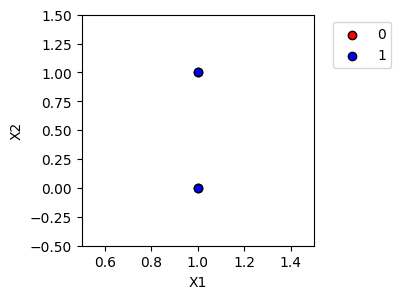

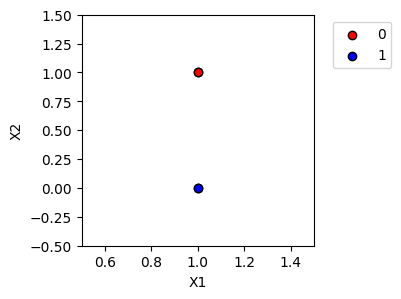

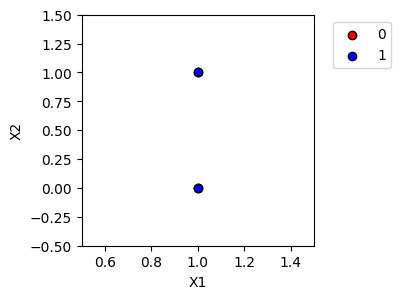

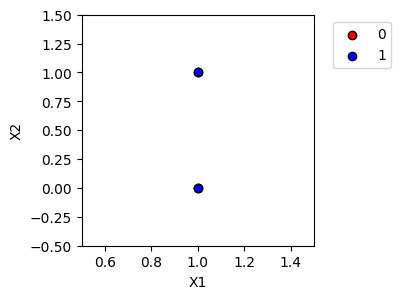

In [16]:
for gate in ["NAND","NOR","XOR","XNOR"]:
    X,y = DataGen(gate)
    X = Preprocess(X)
    w = perceptronLearn(X,y)
    plot_points(X,y)
    # plot_decision_boundary(X,y,w)
